# Relatório de Análise VII

## Criando agrupamentos

In [24]:
import pandas as pd

In [25]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [26]:
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
6,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.38,Casa
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento


In [27]:
dados['Valor'].mean()

5046.172821405663

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

In [28]:
bairros = ['Barra da Tijuca', 'Copacabana','Ipanema', 'Leblon','Botafogo','Flamengo', 'Tijuca']
selecao = dados ['Bairro'].isin(bairros)

In [29]:
dados = dados[selecao]

In [30]:
dados['Bairro'].drop_duplicates()

0          Copacabana
5     Barra da Tijuca
15             Tijuca
19            Ipanema
23           Botafogo
27             Leblon
78           Flamengo
Name: Bairro, dtype: object

In [31]:
grupo_bairro = dados.groupby('Bairro')

In [32]:
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [33]:
grupo_bairro

In [34]:
for bairro, data in grupo_bairro:
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [35]:
for bairro, data in grupo_bairro:
    print(data)

                     Tipo           Bairro  Quartos  Vagas  Suites  Area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21801  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21811         Apartamento  Barra da Tijuca        2      1       1    85   
21812         Apartamento  Barra da Tijuca        3      2       0    98   
21813         Apartamento  Barra da Tijuca        3      2       2   140   
21820  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         Valor  Condominio    IPTU  Valor m2 Tipo Agregado  
5      22000.0         0.0

In [36]:
for bairro, data in grupo_bairro:
    print(f'{bairro} -> R${data.Valor.mean():.2f}')

Barra da Tijuca -> R$7069.55
Botafogo -> R$8791.83
Copacabana -> R$4126.68
Flamengo -> R$4113.53
Ipanema -> R$9352.00
Leblon -> R$8746.34
Tijuca -> R$2043.52


In [37]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


 ## Estatísticas Descritivas

In [43]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [44]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])

,min,max,sum
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [48]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Maximo','sum': 'Soma'}) #Renomeando colunas com o rename

,Mínimo,Maximo,Soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Botafogo,700.0,4500000.0,7675266.0
Copacabana,100.0,35000.0,10910934.0
Flamengo,800.0,35000.0,2937058.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Tijuca,750.0,45000.0,2247872.0


In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

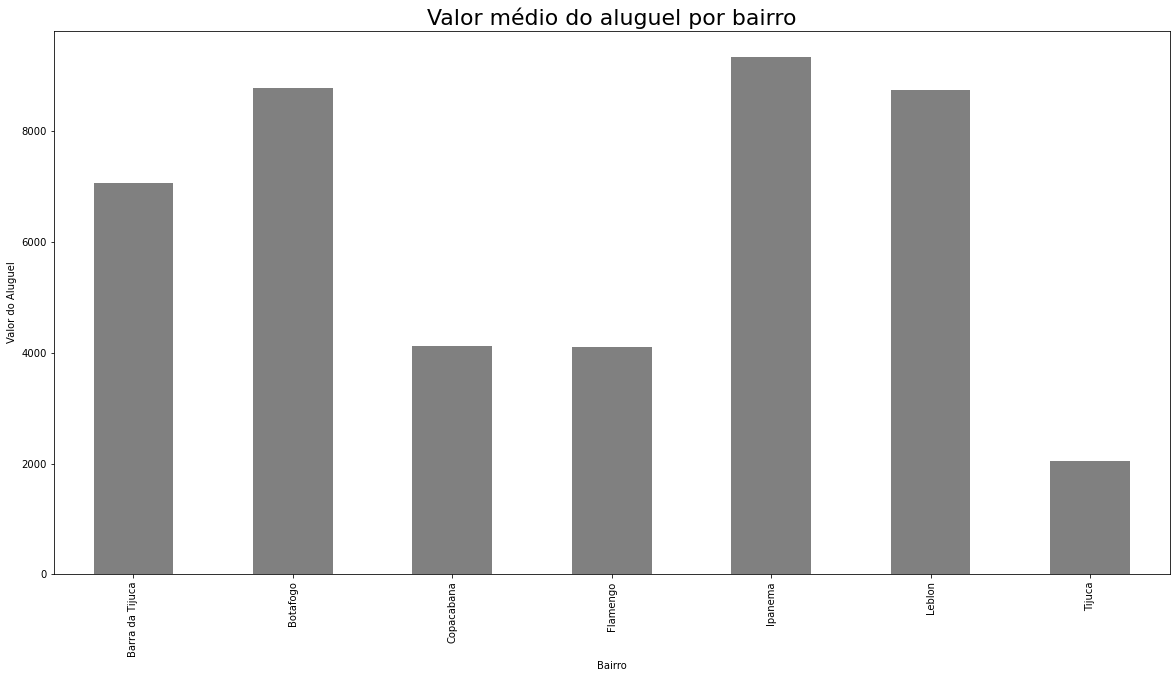

In [71]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'grey')
fig.set_ylabel('Valor do Aluguel') #Dando nome pro eixo Y
fig.set_title('Valor médio do aluguel por bairro', {'fontsize': 22}) #Dando titulo


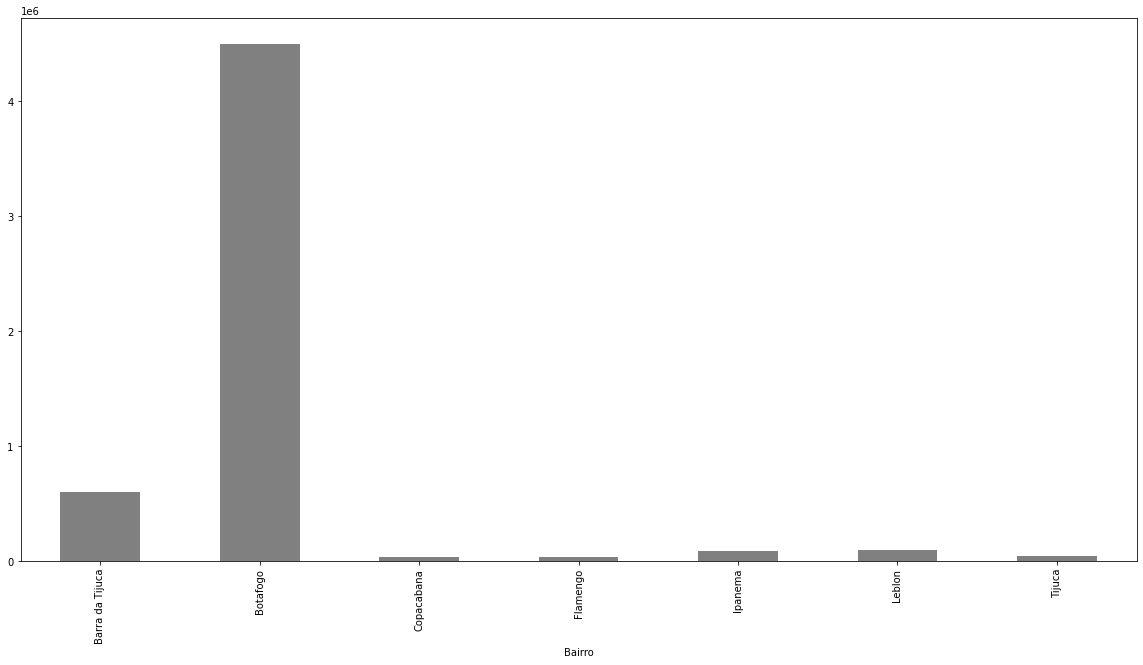

In [73]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'gray')

Text(0.5, 1.0, 'Valor médio do aluguel por bairro')

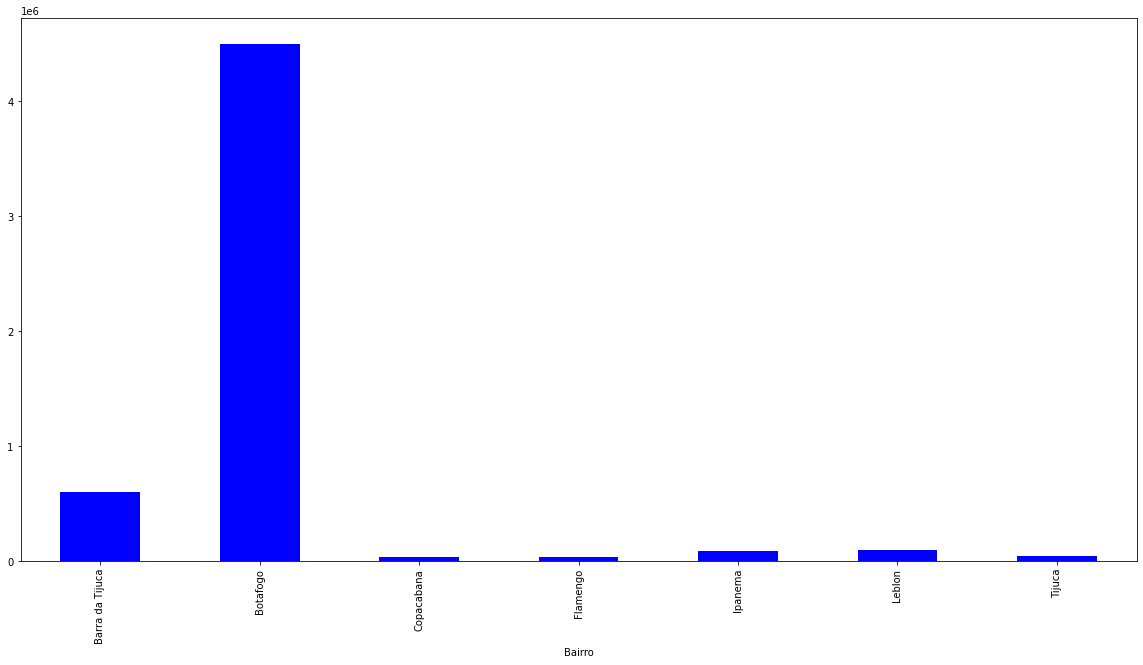